In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
book = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Association Rules\\book.csv")

In [3]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
frequent_itemsets = apriori(book, min_support=0.015, max_len=2,use_colnames = True)

In [5]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)

In [7]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
102,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
68,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
69,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
87,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
86,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
70,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
71,(RefBks),(ItalAtlas),0.2145,0.0370,0.0370,0.172494,4.662005,0.029063,1.163738
59,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
58,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf


In [8]:
## Using diff support and confidence

In [9]:
frequent_itemsets = apriori(book, min_support=0.035, max_len=3,use_colnames = True)

In [10]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)

In [12]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
360,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
361,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
354,(ItalCook),"(ItalArt, CookBks)",0.1135,0.0410,0.0375,0.330396,8.058451,0.032847,1.432191
351,"(ItalArt, CookBks)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
352,"(ItalCook, CookBks)",(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
353,(ItalArt),"(ItalCook, CookBks)",0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
356,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
357,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
359,"(ItalArt, ArtBks)",(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
362,(ItalCook),"(ItalArt, ArtBks)",0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990


### Support Vs Lift

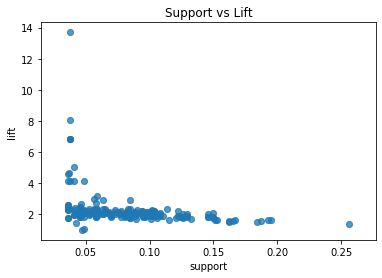

In [13]:
plt.scatter(rules['support'],rules['lift'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

### Support vs Confidence

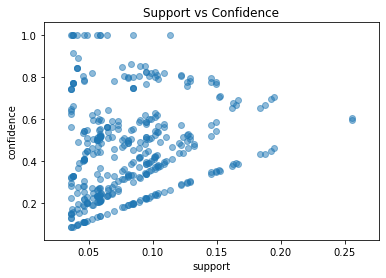

In [14]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Confidence vs Lift

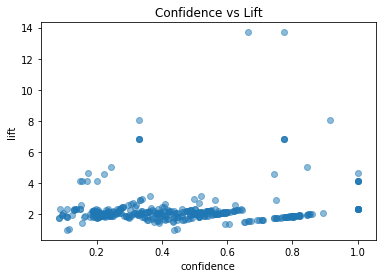

In [15]:
plt.scatter(rules['confidence'],rules['lift'],alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

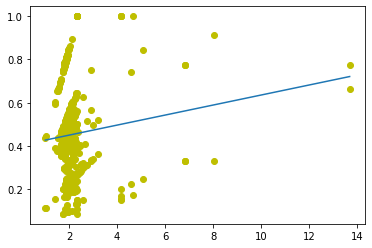

In [16]:
fit = np.polyfit(rules['lift'],rules['confidence'],1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'],
rules['confidence'],'yo',
rules['lift'],
         fit_fn(rules['lift']))

In [17]:
frequent_itemsets = apriori(book, min_support=0.047, max_len=3,use_colnames = True)

In [18]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)

In [20]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
303,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
302,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
237,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
240,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
273,(ItalCook),"(ArtBks, CookBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
272,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
222,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
223,(ItalCook),"(GeogBks, CookBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
156,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
157,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947


### Support VS Lift

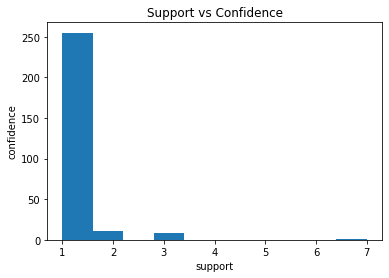

In [21]:
ax = rules["support"],rules["confidence"].value_counts().plot(kind="hist")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Confidence Vs Lift

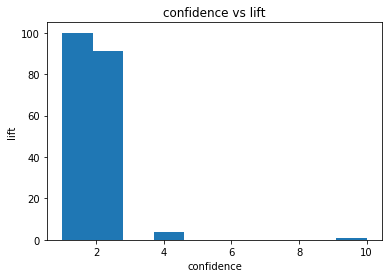

In [22]:
bx = rules["confidence"],rules["lift"].value_counts().plot(kind="hist")
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')
plt.show()

### Support vs Lift

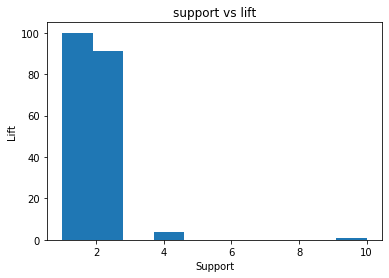

In [23]:
bx = rules["support"],rules["lift"].value_counts().plot(kind="hist")
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('support vs lift')
plt.show()